In [1]:
import argparse
import os

import matplotlib.pyplot as plt
import numpy as np

In [2]:
arch = 'resnet32'
data = 'CIFAR10'

optimizer_s = ['sgd', 'kradmm', 'shampoo', 'krad']
loss_s = {}
prec_s = {}
for optimizer_ in optimizer_s:
    eps_str = '1e-6'
    lr_str = '1e-1'
    args = argparse.Namespace(
        optimizer=optimizer_,
        batch_size=128,
        save_dir='{}_{}_ckpts'.format(arch, data),
        eps_str=eps_str,
        lr_str=lr_str,
        #activation='softplus',
        activation='relu',
    )
    
    args.opt_modifier_str = (
        '_eps{}_lr{}_batch{}'.format(
            args.eps_str, args.lr_str, args.batch_size
        )
    ) + (
        '_soft' if args.activation=='softplus' else '_relu'
    )
    loss_fn = os.path.join(args.save_dir, 'loss_{}{}.npy'.format(args.optimizer, args.opt_modifier_str))
    prec_fn = os.path.join(args.save_dir, 'prec_{}{}.npy'.format(args.optimizer, args.opt_modifier_str))
    loss_, prec_ = [np.load(x) for x in [loss_fn, prec_fn]]
    
    loss_s[optimizer_] = loss_
    prec_s[optimizer_] = prec_


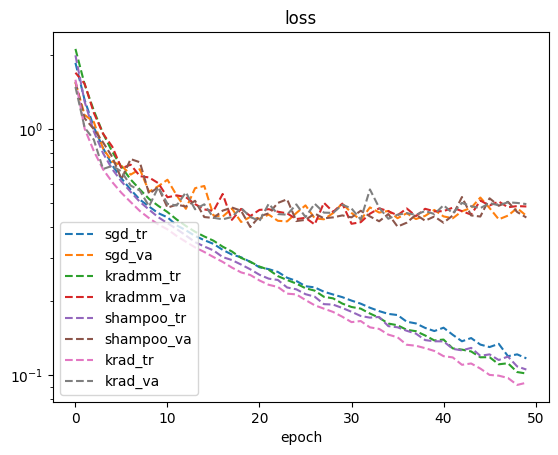

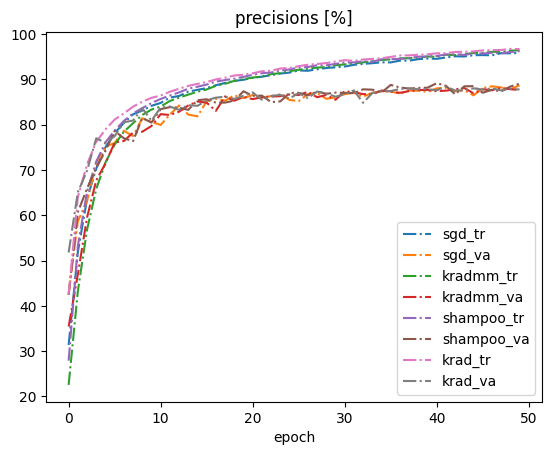

In [3]:
flatten = lambda z: [x for y in z for x in y]
#for opt_ in optimizer_s:
#    print(opt_, loss_s[opt_])
plt.figure()
for opt_name_ in optimizer_s:
    plt.semilogy(loss_s[opt_name_], '--')
plt.legend(flatten([
    ('{}_tr'.format(opt_), '{}_va'.format(opt_)) for opt_ in optimizer_s
]))
plt.xlabel('epoch')
plt.title('loss')


plt.figure()
for opt_name_ in optimizer_s:
    plt.plot(prec_s[opt_name_], '-.')
plt.legend(flatten([
    ('{}_tr'.format(opt_), '{}_va'.format(opt_)) for opt_ in optimizer_s
]))
plt.xlabel('epoch')
plt.title('precisions [%]')

plt.show()